In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#選擇要預測的圖片的來源

download image

In [3]:
import urllib.request
import os
img_url="https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"
img_name = os.path.basename(img_url)
urllib.request.urlretrieve(img_url,img_name)

('Golde33443.jpg', <http.client.HTTPMessage at 0x7f71f5f75e50>)

In [4]:
ls -l

total 212
-rw-r--r-- 1 root root 212652 May 30 09:58 Golde33443.jpg
drwxr-xr-x 1 root root   4096 May 17 13:39 sample_data/


#預處理圖片

查看照片

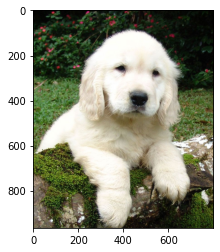

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open(img_name)
imgplot = plt.imshow(img)
plt.show()

轉換為32x32

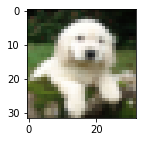

In [6]:
new_width  = 32
new_height = 32
img = img.resize((new_width, new_height), 
                 Image.BILINEAR )
plt.figure(figsize=(2,2))
imgplot = plt.imshow(img)

In [7]:
from tensorflow.keras.preprocessing import image

In [8]:
x_img = image.img_to_array(img)
x_img.shape 

(32, 32, 3)

In [9]:
import numpy as np 

In [10]:
x_img_4d = np.expand_dims(x_img,
                          axis=0)
x_img_4d.shape 

(1, 32, 32, 3)

normalize

In [11]:
x_img_4d[0][0][0]

array([6., 6., 4.], dtype=float32)

In [12]:
x_img_4d_normalize = np.array(x_img_4d) / 255 

In [13]:
x_img_4d_normalize[0][0][0]

array([0.02352941, 0.02352941, 0.01568628], dtype=float32)

連接 gdrive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


複製雲端硬碟模型目錄至虛擬主機

#輸入要載入模型子目錄名稱

In [15]:
!mkdir -p Model/CifarCNNSub/

In [16]:
ls -l Model 

total 4
drwxr-xr-x 2 root root 4096 May 30 09:58 CifarCNNSub/


In [17]:
!cp -r  drive/MyDrive/Model/CifarCNNSub/  Model/

In [18]:
ls -l Model/CifarCNNSub/

total 12272
drwx------ 4 root root     4096 May 30 09:58 SavedModel/
-rw------- 1 root root 12559640 May 30 09:59 weight.h5


#載入模型

In [19]:
from tensorflow.keras.models import load_model

In [20]:
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten,Conv2D,Softmax
class CNN_Model(tf.keras.Model):
  def __init__(self):
    super(CNN_Model, self).__init__(name='CNN_Model')
    self.conv1=Conv2D(filters=32, kernel_size=(5,5),
                      padding='same',activation='relu')
    self.max_pool2d = MaxPooling2D(pool_size=(2, 2))
    self.conv2=Conv2D(filters=64, kernel_size=(5,5),
                      padding='same',activation='relu')
    self.flatten = Flatten();self.fc1 = Dense(750, activation='relu');
    self.out_layer = Dense(10);self.softmax = Softmax()
  def call(self, x):
    x=self.conv1(x);x=self.max_pool2d(x);x=self.conv2(x);x=self.max_pool2d(x)
    x = self.flatten(x);x = self.fc1(x);
    x = self.out_layer(x);x = self.softmax(x)
    return x  
loaded_model = CNN_Model();loaded_model.build(input_shape=(None, 32,32,3))
path="Model/CifarCNNSub/"
weight_filename="weight.h5"
loaded_model.load_weights(path+weight_filename)
print("Loaded weight from："+path+weight_filename)  

Loaded weight from：Model/CifarCNNSub/weight.h5


In [21]:
loaded_model.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  2432      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  51264     
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  3072750   
                                                                 
 dense_1 (Dense)             multiple                  7510      
                                                         

#輸入預處理後的影像進行預測

In [22]:
probability=loaded_model.predict(x_img_4d_normalize) 

In [23]:
probability

array([[9.4117364e-05, 1.1422834e-06, 1.2916750e-01, 2.8208093e-04,
        1.1279976e-07, 8.5705060e-01, 1.1279407e-05, 1.2947613e-02,
        5.7769913e-09, 4.4559746e-04]], dtype=float32)

In [24]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [25]:
prediction

array([5])

In [26]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

#顯示預測結果

In [27]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

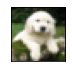

predict: dog
airplane   Probability:0.000094117
automobile Probability:0.000001142
bird       Probability:0.129167497
cat        Probability:0.000282081
deer       Probability:0.000000113
dog        Probability:0.857050598
frog       Probability:0.000011279
horse      Probability:0.012947613
ship       Probability:0.000000006
truck      Probability:0.000445597


In [28]:
show_predicted_probability(x_img_4d_normalize,[],prediction,probability,0)